# Assignment 1

In [64]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [30]:
df_train = pd.read_csv("mnist_train.csv")
df_test = pd.read_csv("mnist_test.csv")

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [32]:
X = df_train.drop('label',1)
Y = df_train['label']

In [33]:
X_test = df_test.drop('label',1)
Y_test = df_test['label']

In [141]:
kmeans = KMeans()
kmeans.set_params(n_clusters=10)
kmeans.fit(X)

KMeans(n_clusters=10)

In [142]:
pre = []
n = 0
for i in range(10):
    res = df_train[(kmeans.labels_ == i)]
    common = res['label'].mode()
    pre.append(common)
    pred=np.array(pre)
print(pred)
#cluster num --> mode

[[4]
 [3]
 [0]
 [7]
 [8]
 [6]
 [6]
 [1]
 [2]
 [1]]


In [145]:
ytrain_hat = kmeans.labels_
sum=0.0
for i in range(len(X)):
    for j in range(10):
        if(ytrain_hat[i] == j):
            if(Y[i] == pred[j]):
                sum = sum+1
print('Train set score: %f' % (sum/len(X)))

Train set score: 0.583033


In [144]:
kmeans.labels_
y_hat = kmeans.predict(X_test) #cluster number
res=[]
sum=0.0
for i in range(len(X_test)):
    for j in range(10):
        if(y_hat[i] == j):
            if(Y_test[i] == pred[j]):
                sum = sum+1
print('Test set score: %f' % (sum/len(X_test)))

Test set score: 0.589600


# Assignment 2
## Logistic Regression

Logistic Regression is commonly used to estimate the probability that an instance belongs to a particular class . If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class, or else it predicts that it does not. This makes it a binary classifier.
1. pros
    1. esay to understand and widely used
    2. computation cost low
    3. Feature scaling not needed
2. cons
    1. Poor performance on non-linear data
    


In [68]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X,Y)
y_pred1 = clf.predict(X_test)


sum=0.0
for i in range(len(X_test)):
    if(y_pred1[i] == Y_test[i]):
        sum = sum+1
    
print('Test set score: %f' % (sum/len(X_test)))

Test set score: 0.925500


## SVM
Support Vector Machine (SVM) is a very powerful model, capable of performing linear or nonlinear classification, regression, and even outlier detection. SVMs are particularly well suited for classification of complex but small- or medium-sized datasets. 
1. pros
    1. Effective in high dimensional spaces
    2. Capable of performing linear or nonlinear classification, regression
2. cons
    1. It doesn’t perform well when we have large dataset because the required training time is longer
    2. Poor performance with overlapped classes 
    3. Selecting the appropriate kernel function can be tricky.

In [303]:
from sklearn import svm
model = svm.LinearSVC()
model.fit(X, Y)
y_pred2 = model.predict(X_test)

sum=0.0
for i in range(len(X_test)):
    if(y_pred2[i] == Y_test[i]):
        sum = sum+1
    
print('Test set score: %f' % (sum/len(X_test)))

Test set score: 0.884000


## Decision Tree
A decision tree is a simple tree-like structure constituting nodes and branches. Data is split based on any of the input features at each node, generating two or more branches as output.
1. pros
    1. Normalization or scaling of data not needed
    2. Easy to explain and visualization
    3. It can handle missing data very well
    4. Automatic Feature selection 
2. cons
    1. Prone to overfitting
    2. Sensitive to data
    3. Higher time required to train decision tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=50)
tree.fit(X,Y)
y_pred3 = tree.predict(X_test)

sum=0.0
for i in range(len(X_test)):
    if(y_pred3[i] == Y_test[i]):
        sum = sum+1
    
print('Test set score: %f' % (sum/len(X_test)))

Test set score: 0.876300


## Random Forest
Random Forest is an ensemble of Decision Trees, generally trained via the bagging method.
1. pros
    1. The individual errors of trees are minimized and overall variance and error is reduced
    2. It can handle huge amount of data
    3. It can handle missing data very well
    4. Lower risk of overfitting
    5. Useful to extract feature importance
2. cons
    1. Higher time required to train model


In [71]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=600,n_jobs=-1,oob_score=True)
forest.fit(X,Y)
y_pred4 = forest.predict(X_test)

sum=0.0
for i in range(len(X_test)):
    if(y_pred4[i] == Y_test[i]):
        sum = sum+1
    
print('Test set score: %f' % (sum/len(X_test)))

Test set score: 0.971000


## comparison table

<table>
  <tr>
    <th>Model</th>
    <th>Accuracy</th>
  </tr>
  <tr>
    <td>KMeans</td>
    <td>58.96%</td>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td>92.55%</td>
  </tr>
  <tr>
    <td>SVM</td>
    <td>88.40%</td>
  </tr>
  <tr>
    <td>Decison Tree</td>
    <td>87.73%</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>97.10%</td>
  </tr>
</table>

# Assignment 3
Accuracy = 0.9924

In [88]:
import argparse

#import tensorflow as tf
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()

from tensorflow.examples.tutorials.mnist import input_data

def build_arg_parser():
    parser = argparse.ArgumentParser(description='Build a CNN classifier \
            using MNIST data')
    parser.add_argument('--input-dir', dest='input_dir', type=str,
            default='./mnist_data', help='Directory for storing data')
    return parser

def get_weights(shape):
    data = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(data)

def get_biases(shape):
    data = tf.constant(0.1, shape=shape)
    return tf.Variable(data)

def create_layer(shape):
    # Get the weights and biases
    W = get_weights(shape)
    b = get_biases([shape[-1]])

    return W, b

def convolution_2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1],
            padding='SAME')

def max_pooling(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
            strides=[1, 2, 2, 1], padding='SAME')

if __name__ == '__main__':
    #args = build_arg_parser().parse_args()
    args =build_arg_parser().parse_known_args()[0]

    # Get the MNIST data
    mnist = input_data.read_data_sets(args.input_dir, one_hot=True)

    # The images are 28x28. Create the input layer
    x = tf.placeholder(tf.float32, [None, 784])

    # Reshape 'x' into a 4D tensor
    x_image = tf.reshape(x, [-1, 28, 28, 1] )

    # Define the first convolutional layer
    W_conv1, b_conv1 = create_layer([5, 5, 1, 32])  # convolution kernel: 5*5*1, number of kernel: 32

    # Convolve the image with weight tensor, add the
    # bias, and then apply the ReLU function
    h_conv1 = tf.nn.relu(convolution_2d(x_image, W_conv1) + b_conv1)

    # Apply the max pooling operator
    h_pool1 = max_pooling(h_conv1)  # make pooling, output: 14*14*32

    # Define the second convolutional layer
    W_conv2, b_conv2 = create_layer([5, 5, 32, 64])

    # Convolve the output of previous layer with the
    # weight tensor, add the bias, and then apply
    # the ReLU function
    h_conv2 = tf.nn.relu(convolution_2d(h_pool1, W_conv2) + b_conv2)  # output: 14*14*64

    # Apply the max pooling operator
    h_pool2 = max_pooling(h_conv2)  # output: 7*7*64

    # Define the fully connected layer
    W_fc1, b_fc1 =create_layer([7 * 7 * 64, 1024])

    # Reshape the output of the previous layer
    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])

    # Multiply the output of previous layer by the
    # weight tensor, add the bias, and then apply
    # the ReLU function * Use "tf.matmul" for matrix multiplication
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)  # output: 1*1024

    # Define the dropout layer using a probability placeholder
    # for all the neurons
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1,keep_prob)

    # Define the readout layer (output layer)
    W_fc2, b_fc2 = create_layer([1024, 10])
    y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)  # output: 1*10

    # Define the entropy loss and the optimizer
    y_loss = tf.placeholder(tf.float32, [None, 10])
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=y_loss))
    optimizer = tf.train.AdamOptimizer(1e-4).minimize(loss)

    # Define the accuracy computation
    predicted = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_loss, 1))
    accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))

    # Create and run a session
    sess = tf.InteractiveSession()
    init = tf.initialize_all_variables()
    sess.run(init)

    # Start training
    num_iterations = 21000
    batch_size = 75
    print('\nTraining the model....')
    for i in range(num_iterations):
        # Get the next batch of images
        batch = mnist.train.next_batch(batch_size)

        # Print progress
        if i % 50 == 0:
            cur_accuracy = accuracy.eval(feed_dict = {
                    x: batch[0], y_loss: batch[1], keep_prob: 1.0})
            print('Iteration', i, ', Accuracy =', cur_accuracy)

        # Train on the current batch
        optimizer.run(feed_dict = {x: batch[0], y_loss: batch[1], keep_prob: 0.5})

    # Compute accuracy using test data
    print('Test accuracy =', accuracy.eval(feed_dict = {
            x: mnist.test.images, y_loss: mnist.test.labels,
            keep_prob: 1.0}))



Extracting ./mnist_data/train-images-idx3-ubyte.gz
Extracting ./mnist_data/train-labels-idx1-ubyte.gz
Extracting ./mnist_data/t10k-images-idx3-ubyte.gz
Extracting ./mnist_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use `tf.global_variables_initializer` instead.

Training the model....
Iteration 0 , Accuracy = 0.13333334
Iteration 50 , Accuracy = 0.18666667
Iteration 100 , Accuracy = 0.46666667
Iteration 150 , Accuracy = 0.42666668
Iteration 200 , Accuracy = 0.56
Iteration 250 , Accuracy = 0.74666667
Iteration 300 , Accuracy = 0.84
Iteration 350 , Accuracy = 0.9066667
Iteration 400 , Accuracy = 0.84
Iteration 450 , Accuracy = 0.7866667
Iteration 500 , Accuracy = 0.84
Iteration 550 , Accuracy = 0.84
Iteration 600 , Accuracy = 0.92
Iteration 650 , Accuracy = 0.88
Iteration 700 , Accuracy = 0.8666667
Iteration 750 , Accuracy = 0.96
Iteration 800 , Accuracy = 0.94666666
Iteration 850 , Accuracy = 0.96
Iteration 900 , Accuracy = 0.96
Iteration 950 , Accuracy = 0.93333334
Iterat

Iteration 10850 , Accuracy = 0.97333336
Iteration 10900 , Accuracy = 0.97333336
Iteration 10950 , Accuracy = 1.0
Iteration 11000 , Accuracy = 1.0
Iteration 11050 , Accuracy = 0.96
Iteration 11100 , Accuracy = 1.0
Iteration 11150 , Accuracy = 1.0
Iteration 11200 , Accuracy = 1.0
Iteration 11250 , Accuracy = 1.0
Iteration 11300 , Accuracy = 1.0
Iteration 11350 , Accuracy = 0.9866667
Iteration 11400 , Accuracy = 1.0
Iteration 11450 , Accuracy = 0.97333336
Iteration 11500 , Accuracy = 1.0
Iteration 11550 , Accuracy = 1.0
Iteration 11600 , Accuracy = 0.9866667
Iteration 11650 , Accuracy = 0.9866667
Iteration 11700 , Accuracy = 1.0
Iteration 11750 , Accuracy = 1.0
Iteration 11800 , Accuracy = 0.97333336
Iteration 11850 , Accuracy = 0.9866667
Iteration 11900 , Accuracy = 0.9866667
Iteration 11950 , Accuracy = 0.9866667
Iteration 12000 , Accuracy = 0.9866667
Iteration 12050 , Accuracy = 1.0
Iteration 12100 , Accuracy = 1.0
Iteration 12150 , Accuracy = 1.0
Iteration 12200 , Accuracy = 1.0
Itera

# Assignment 4
## Make own dataset

In [148]:
from PIL import Image
def pre_pic(picName):
    img = Image.open(picName)
    relm = img.resize((28,28),Image.ANTIALIAS)
    
    im_arr = np.array(relm.convert("L"))
    threshold = 110
    
    for i in range(28):
        for j in range(28):
            im_arr[i][j]= 255-im_arr[i][j]
            if(im_arr[i][j]<threshold):
                im_arr[i][j] = 0
            else:im_arr[i][j] = 255
    nm_arr = im_arr.reshape([1,784])
    nm_arr = nm_arr.astype(np.float32)
    img_ready = np.multiply(nm_arr,1.0/255.0)
    return img_ready

In [270]:
pic0_001 = pre_pic("9_005.png")

In [271]:
np.savetxt("test.csv", pic0_001 , delimiter=",",fmt='%d')

In [274]:
mytest = pd.read_csv("number.csv")

In [293]:
mylabel = mytest['label']
mydata = mytest.drop('label',1)*255

## Run your own ML models from Assignment #1 - #4 on these 50 images

In [294]:
#Kmeans
pre0 = kmeans.predict(mydata) #cluster number
res=[]
sum=0.0
for i in range(len(mydata)):
    for j in range(10):
        if(pre0[i] == j):
            if(mylabel[i] == pred[j]):
                sum = sum+1
print('Test set score: %f' % (sum/len(mydata)))

Test set score: 0.100000


In [295]:
#LG
pre1 = clf.predict(mydata)
sum=0.0
for i in range(len(mydata)):
    if(pre1[i] == mylabel[i]):
        sum = sum+1
    
print('Test set score: %f' % (sum/len(mydata)))

Test set score: 0.180000


In [296]:
#SVM
pre2 = model.predict(mydata)

sum=0.0
for i in range(len(mydata)):
    if(pre2[i] == mylabel[i]):
        sum = sum+1
    
print('Test set score: %f' % (sum/len(mydata)))

Test set score: 0.220000


In [297]:
#Decision Tree
pre3 = tree.predict(mydata)

sum=0.0
for i in range(len(mydata)):
    if(pre3[i] == mylabel[i]):
        sum = sum+1
    
print('Test set score: %f' % (sum/len(mydata)))


Test set score: 0.180000


In [298]:
#Random Forest
pre4 = forest.predict(mydata)

sum=0.0
for i in range(len(mydata)):
    if(pre4[i] == mylabel[i]):
        sum = sum+1
    
print('Test set score: %f' % (sum/len(mydata)))

Test set score: 0.180000


In [343]:
#CNN
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder() 
new_my_label = enc.fit_transform(mylabel.values.reshape(-1,1)).toarray()
print('Test accuracy =', accuracy.eval(feed_dict = {
        x: mydata, y_loss: new_my_label,
        keep_prob: 1.0}))

Test accuracy = 0.34


## Show all 50 images you create with the corresponding labels you intend to assign
I write those numbers using iPAD. So I put the screenshoot here.

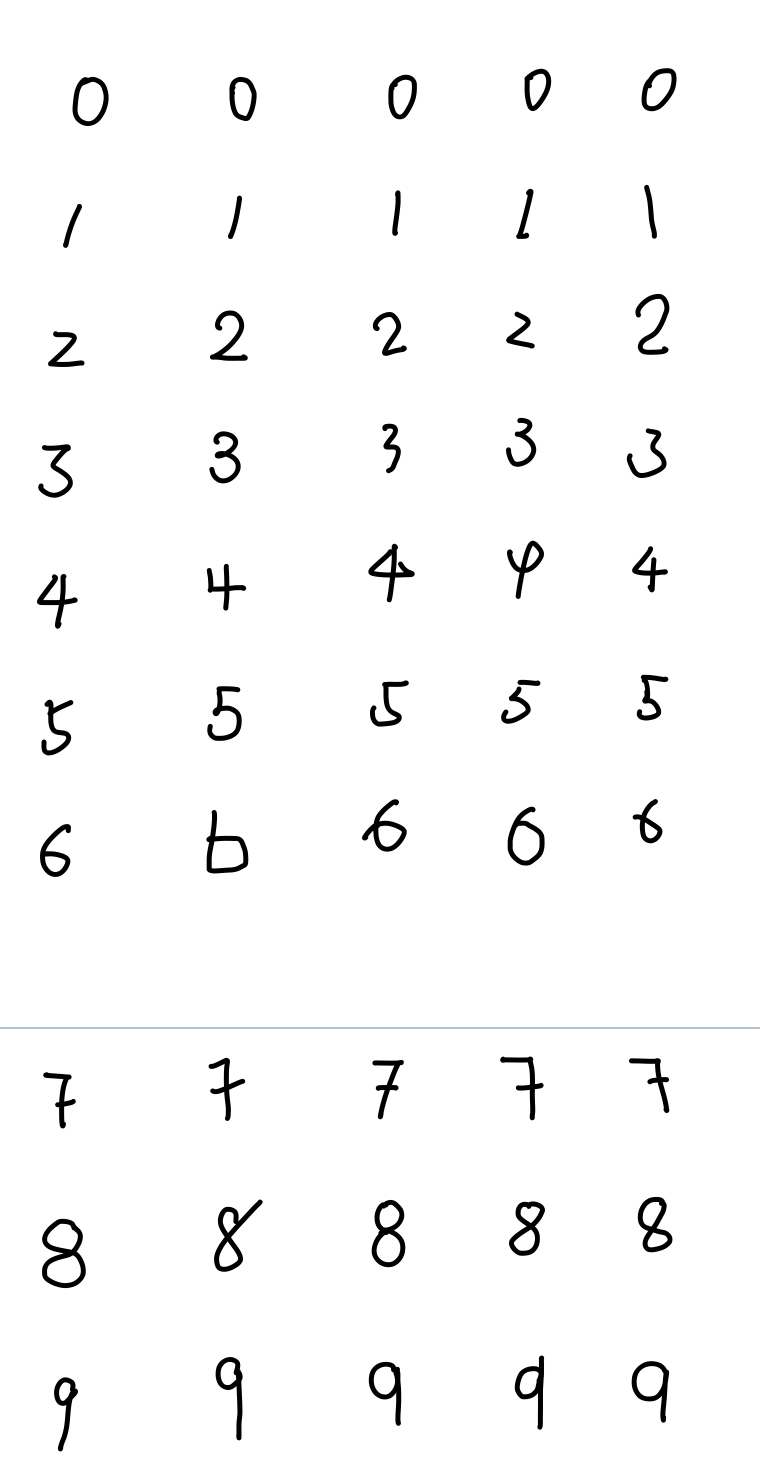

In [305]:
mytest.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Make a table to show the test accuracy on these 50 images for each ML model

<table>
  <tr>
    <th>Model</th>
    <th>Accuracy</th>
  </tr>
  <tr>
    <td>KMeans</td>
    <td>10%</td>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td>18%</td>
  </tr>
  <tr>
    <td>SVM</td>
    <td>22%</td>
  </tr>
  <tr>
    <td>Decison Tree</td>
    <td>18%</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>18%</td>
  </tr>
  <tr>
    <td>CNN</td>
    <td>34%</td>
  </tr>
</table>